# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 3: Polynomial and LASSO Regression

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [2]:
from collections import Counter
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

%matplotlib inline

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS

- **THIS IS AN INDIVIDUAL ASSIGNMENT. Collaboration on this homework is NOT PERMITTED.**

- **THIS IS A TWO-WEEK HOMEWORK**. The material is indeed two-weeks-worth of work, so make sure you start it early!!!

- To submit your assignment follow the instructions given in Canvas.

- Please **restart the kernel and run the entire notebook again before you submit.**

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun your notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use `.head(...)` when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate and report $R^2$", do not just output the value from a cell. Write a `print(...)` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients for degree-5 polynomial model" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

- **Your code may also be evaluated for efficiency and clarity.** As a result, correct output is not always sufficient for full credit.

<hr style="height:2pt">

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)


- [**Question 1: Data visualization [5 pts]**](#part1)
  - [Solutions](#part1solutions)


- [**Your Homework 3 roadmap**](#roadmap)


- [**Question 2: Guesstimate the polynomial relationship [14 pts]**](#part2)
  - [Solutions](#part2solutions)


- [**Question 3: Use a validation set to find the most promising polynomial relationship [12 pts]**](#part3)
  - [Solutions](#part3solutions)


- [**Question 4: Finding the best model by k-fold cross validation [14 pts]**](#part4)
  - [Solutions](#part4solutions)


- [**Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]**](#part5)
  - [Solutions](#part5solutions)


- [**Question 6: Improving model consistency with LASSO regularization [33 pts]**](#part6)
  - [Solutions](#part6solutions)


- [**Question 7: Analyze your best test MSEs for each section of the homework [6 pts]**](#part7)
  - [Solutions](#part7solutions)

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

### Predicting percentage change in bacteria populations given their spreading factor

In this homework, we will explore polynomial regression for predicting a quantitative variable. Specifically, we will build regression models that can predict the percentage change in bacteria population after 4 hours based on their "spreading factor". These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population is positive, this indicates that the size of the bacteria population has grown. One important factor to note is that the percentage change could be negative. This indicates that within the specified time frame, the population of the bacteria has decreased from its original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file gives information about the change in percentage of the population and the second column contains the spreading factor of bacteria populations.


### Problem Description

We will predict the percentage change in population, given the spreading factor. For this exercise, we will consider the `Spreading_factor` to be our predictor variable and `Perc_population` to be our response variable. We will explore several different approaches, with mean squared error ($MSE$) as an evaluative criteria, for finding the best fit and most robust polynomial regression for modeling this relationship.


<a id="part1"></a>

## <div class='exercise'>Question 1: Data visualization [5 pts]</div> 
    
[Return to contents](#contents)
    
**1.1** Generate a scatter plot of the data points in the `bacteria_train.csv` file with the spreading factor on the $x$-axis and the percentage change on the $y$-axis.

**REMEMBER:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals that clearly communicate the data (as described in the [INSTRUCTIONS](#instructions) at the start of this notebook). Visuals should typically be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

**1.2** Based on the graph, is there any discernable relationship between the spreading factor and percentage change in population?

<a id="part1solutions"></a>

## Question 1: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**1.1** Generate a scatter plot of the data points in the `bacteria_train.csv` file with the spreading factor on the $x$-axis and the percentage change on the $y$-axis.

**REMEMBER:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals that clearly communicate the data (as described in the [INSTRUCTIONS](#instructions) at the start of this notebook). Visuals should typically be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

</div>

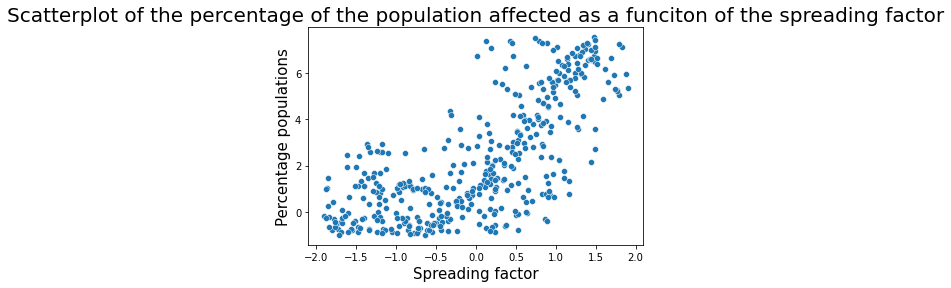

In [3]:
# your code here
df = pd.read_csv('data/bacteria_train.csv')
df_new = pd.read_csv('data/bacteria_test.csv')

y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 

sns.scatterplot(data=df, x='Spreading_factor', y='Perc_population')
plt.xlabel('Spreading factor', size = 15)
plt.ylabel('Percentage populations', size = 15)
plt.title("Scatterplot of the percentage of the population affected as a funciton of the spreading factor", size =20)
plt.show()


In [4]:

df = pd.read_csv('data/bacteria_train.csv')
df_new = pd.read_csv('data/bacteria_test.csv')

y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 



<div class='exercise-r'>

**1.2** Based on the graph, is there any discernable relationship between the spreading factor and percentage change in population?

</div>

**Yes there is a discernable relationship between the spreading factor and the percentage change in population affected. The higher the spreading factor, the higher the percentage of population infected.**


<a id="roadmap"></a>

<hr style='height:2px'> 

## Your Homework 3 roadmap

[Return to contents](#contents)

**We will be following this roadmap for Question 2 through Question 6:**

![](data/soln-roadmap.png)


<a id="part2"></a>

## <div class='exercise'>Question 2: Guesstimate the polynomial relationship [14 pts]</div> 

[Return to contents](#contents)


**2.1** Guesstimate the degree of the polynomial regression that may best fit the data given our observation of the data in Question 1, and then fit that model following the requirements outlined below:
- Create a single dictionary called `best_mse_dict` to store the best test $MSE$s for each type of model we will be building in this notebook. The keys of this dictionary will be the question number, and the values will be the $MSE$ values. So, for this question, you will have `best_mse_dict["2.1"] = ...` .

- Generate `PolynomialFeatures(...)` for your guesstimated degree and fit a polynomial regression using scikit-learn's `LinearRegression(...)` on the training set.
- Generate a plot with both the train and test data, as well as your prediction curve.
- Compute and print the $MSE$ on the test set and save that value to `best_mse_dict`.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.
  
**2.2** Now we will compute confidence intervals for the coefficients generated in our model. For the same degree polynomial regression fit above in 2.1, compute and plot the 95% confidence interval of the beta (i.e. $\beta$) values obtained in that regression model. Be certain to meet these primary requirements:

- Report the coefficient values of the model fit above in 2.1.
- Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data (you can limit your number of bootstraps to 100).
- For each bootstrap, store the coefficients of the model, and use those stored coefficients to compute the $2.5$ and $97.5$ confidence bounds.
- Plot the bootstrapped coefficients as a grid of histograms, one histogram for each $\beta_i$, illustrating the distribution of bootstrapped coefficients for each $\beta_i$. Each distribution should indicate the regions of 95% confidence. Use `plt.subplots(...)` to arrange your histograms as a grid of plots.
- Comment on your findings.

**REMEMBER:** Bootstrapped samples should always be the same size as the original data and sampled with replacement.

<a id="part2solutions"></a>

## Question 2: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**2.1** Guesstimate the degree of the polynomial regression that may best fit the data given our observation of the data in Question 1, and then fit that model following the requirements outlined below:
- Create a single dictionary called `best_mse_dict` to store the best test $MSE$s for each type of model we will be building in this notebook. The keys of this dictionary will be the question number, and the values will be the $MSE$ values. So, for this question, you will have `best_mse_dict["2.1"] = ...` .

- Generate `PolynomialFeatures(...)` for your guesstimated degree and fit a polynomial regression using scikit-learn's `LinearRegression(...)` on the training set.
- Generate a plot with both the train and test data, as well as your prediction curve.
- Compute and print the $MSE$ on the test set and save that value to `best_mse_dict`.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.

</div>

In [5]:
# your code here


In [6]:
# your code here
y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 

best_mse_dict = {}

x_poly_train = PolynomialFeatures(degree = 3, include_bias = False).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree = 3, include_bias = False).fit_transform(x_test)
    
lr=LinearRegression()
lr.fit(x_poly_train, y_train)

y_pred_train = lr.predict(x_poly_train)
y_pred_test = lr.predict(x_poly_test)


mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

best_mse_dict.update({'2.1': mse_test})
print(best_mse_dict)

print("I chose the degree to be 3. The MSE of the test here is ", mse_test)


{'2.1': 2.65190565451496}
I chose the degree to be 3. The MSE of the test here is  2.65190565451496


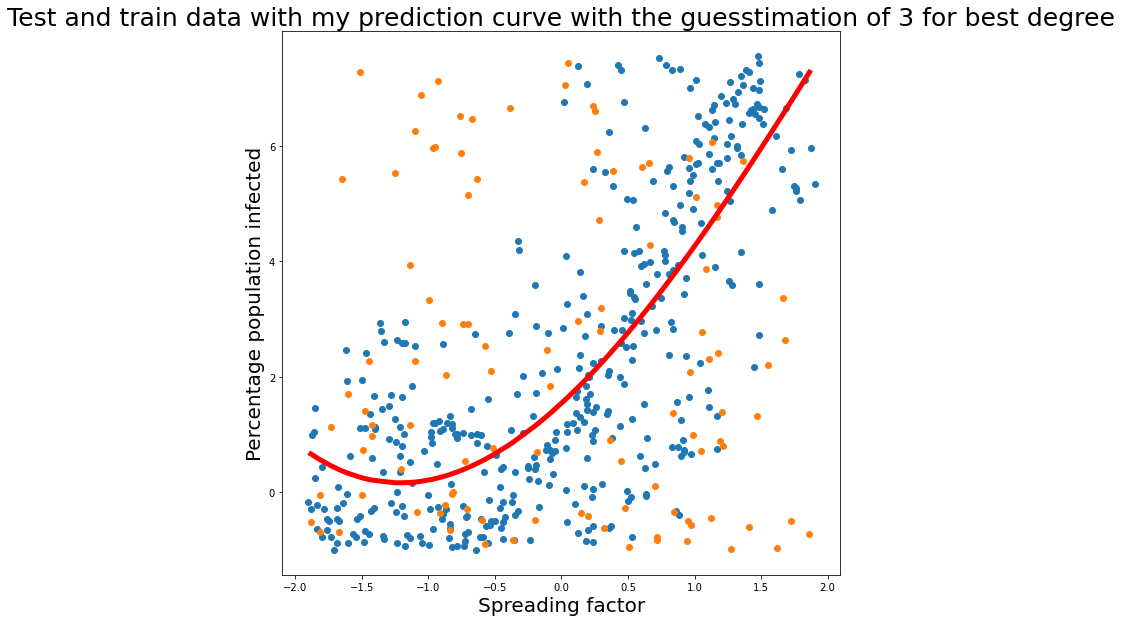

In [7]:
# your code here
y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 

x_test =x_test.sort_values(['Spreading_factor'])


x_poly_train = PolynomialFeatures(degree = 3, include_bias = False).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree = 3, include_bias = False).fit_transform(x_test)
    
lr=LinearRegression()
lr.fit(x_poly_train, y_train)

y_pred_train = lr.predict(x_poly_train)
y_pred_test = lr.predict(x_poly_test)


min_val = x_test.min()
max_val = x_test.max()


plt.figure(figsize = (10,10))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, 'r', linewidth = 5)
plt.title("Test and train data with my prediction curve with the guesstimation of 3 for best degree", size = 25)
plt.ylabel("Percentage population infected", size = 20)
plt.xlabel("Spreading factor", size = 20)
plt.show()



**INTERPRETATION:**

**I chose the degree 3 because the plot in exercise 1 looked like of an S-shape. Hence I guess-stimated that a good degree would be 3.**


<div class='exercise-r'>

**2.2** Now we will compute confidence intervals for the coefficients generated in our model. For the same degree polynomial regression fit above in 2.1, compute and plot the 95% confidence interval of the beta (i.e. $\beta$) values obtained in that regression model. Be certain to meet these primary requirements:

- Report the coefficient values of the model fit above in 2.1.
- Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data (you can limit your number of bootstraps to 100).
- For each bootstrap, store the coefficients of the model, and use those stored coefficients to compute the $2.5$ and $97.5$ confidence bounds.
- Plot the bootstrapped coefficients as a grid of histograms, one histogram for each $\beta_i$, illustrating the distribution of bootstrapped coefficients for each $\beta_i$. Each distribution should indicate the regions of 95% confidence. Use `plt.subplots(...)` to arrange your histograms as a grid of plots.
- Comment on your findings.

**REMEMBER:** Bootstrapped samples should always be the same size as the original data and sampled with replacement.

</div>

In [8]:
print("Here is the  report of the coefficient values of the model fit from 2.1:", lr.coef_)
print("The intercept is:",  lr.intercept_)

Here is the  report of the coefficient values of the model fit from 2.1: [ 2.12338009  0.69422214 -0.09858653]
The intercept is: 1.5449914507699227


In [9]:

# your code here

y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 

def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df

# Initialize empty lists to store beta values from 100 bootstraps 
# of the original data
beta0_list, beta1_list, beta2_list, beta3_list = [],[], [], []

# Set the number of bootstraps
numberOfBootstraps = 100

# Loop over the number of bootstraps
for i in range(numberOfBootstraps):
    
    # Call the function bootstrap with the original dataframe
    df_new = bootstrap(df)
    x_poly_train = PolynomialFeatures(degree = 3, include_bias=False).fit_transform(x_train)

    # Compute the polynomial features for the validation set
    x_poly_test = PolynomialFeatures(degree = 3, include_bias=False).fit_transform(x_test)

    lr = LinearRegression()
    lr.fit(x_poly_train, df_new["Perc_population"])
    
    coeffs = lr.coef_
    beta0 = coeffs[0]
    beta1 = coeffs[1]
    beta2 = coeffs[2]
    #beta3 = coeffs[3]
    
     
    coeffs = lr.coef_
    ##beta0 = coeffs[0]
    #beta1 = coeffs[1]
    #beta2 = coeffs[2]
    #beta3 = coeffs[3]
    
    beta0_list.append(beta0)
    beta1_list.append(beta1)
    beta2_list.append(beta2)
    #beta3_list.append(beta3)


    y_pred_train = lr.predict(x_poly_train)
    y_pred_test = lr.predict(x_poly_test)
    
    
beta0_list.sort()
beta1_list.sort()
beta2_list.sort()
beta3_list.sort()


# Find the 95% percent confidence for beta0 interval using the 
# percentile function
beta0_CI = (np.percentile(beta0_list,2.5),np.percentile(beta0_list,97.5))

# Find the 95% percent confidence for beta1 interval using the 
# percentile function
beta1_CI = (np.percentile(beta1_list,2.5),np.percentile(beta1_list,97.5))

# Find the 95% percent confidence for beta0 interval using the 
# percentile function
beta2_CI = (np.percentile(beta2_list,2.5),np.percentile(beta2_list,97.5))

# Find the 95% percent confidence for beta1 interval using the 
# percentile function
#beta3_CI = (np.percentile(beta3_list,2.5),np.percentile(beta3_list,97.5))

# Helper function to plot the histogram of beta values along with 
# the 95% confidence interval




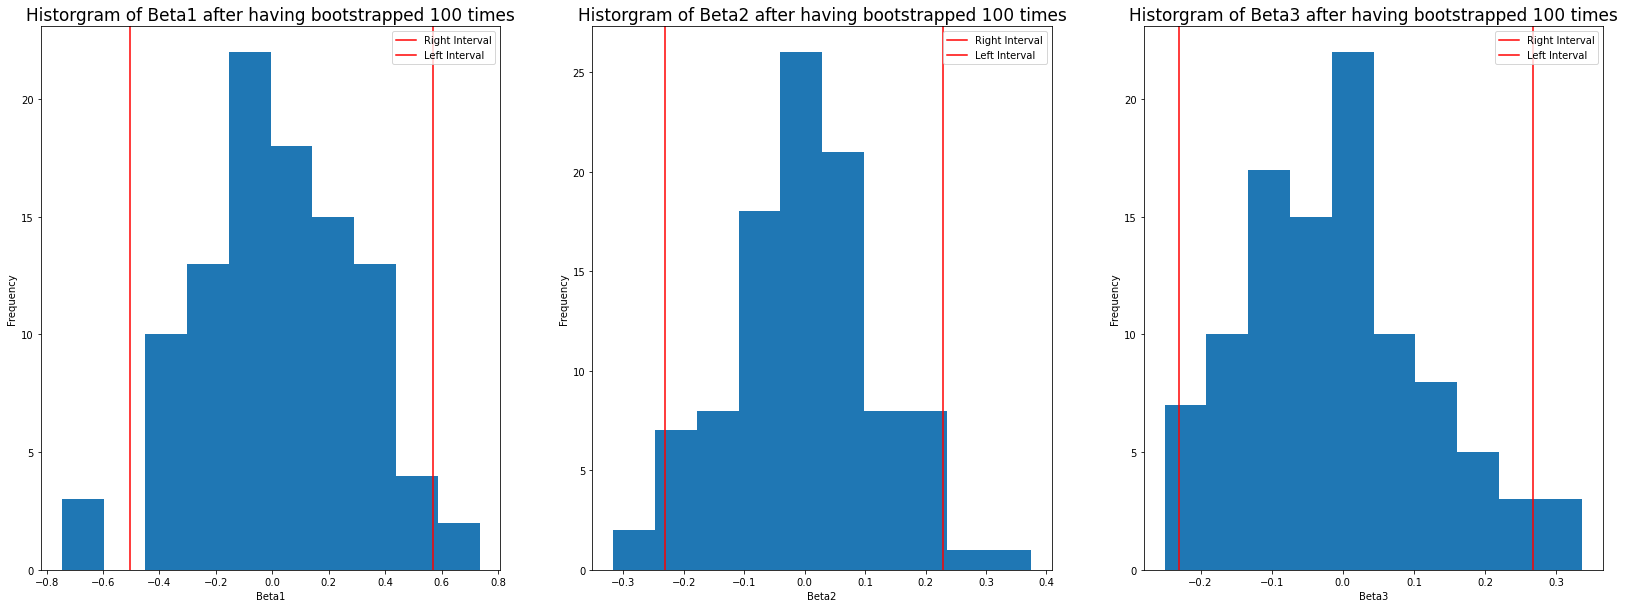

In [10]:
betas = [beta0_list, beta1_list, beta2_list, beta3_list]

fig, ax = plt.subplots(1,3, figsize=(28,10))

ax[0].hist(beta0_list)
ax[0].axvline(beta0_CI[0], color = 'r', label = 'Right Interval')
ax[0].axvline(beta0_CI[1], color = 'red', label = 'Left Interval')

ax[1].hist(beta1_list)
ax[1].axvline(beta1_CI[0], color = 'r', label = 'Right Interval')
ax[1].axvline(beta1_CI[1], color = 'red', label = 'Left Interval')

ax[2].hist(beta2_list)
ax[2].axvline(beta2_CI[0], color = 'r', label = 'Right Interval')
ax[2].axvline(beta2_CI[1], color = 'red', label = 'Left Interval')


for i in range(0,3):
    ax[i].set_xlabel(f'Beta{i+1}')
    ax[i].set_ylabel("Frequency")
    ax[i].set_title(f"Historgram of Beta{i+1} after having bootstrapped 100 times", size = 17)
    ax[i].legend()

**INTERPRETATION:**

**Given the bootstrap we are going to have every time different data due to the fact that a bootstrap is a random sampling out of the training dataset, but the confidence intervals have all the same span. Every time I refhresh this cell I will have as a consequence new graphs.**


<a id="part3"></a>

## <div class='exercise'>Question 3: Use a validation set to find the most promising polynomial relationship [12 pts]</div> 

[Return to contents](#contents)

**3.1** Find the best degree polynomial relationship using a single validation set. Be certain to meet the requirements outlined below:

- Split your training data such that you separate out a single 20% validation split.
- Fit polynomial regression models up to **degree 30** on the 80% training set (one model for each degree polynomial regression).
- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Compare the validation $MSE$ values and select and report the degree for which the validation error is lowest.


**3.2** Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). Report the train and test $MSE$ and add the test $MSE$ to `best_mse_dict`.


**3.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from [Question 2](#part2solutions).

<a id="part3solutions"></a>

## Question 3: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**3.1** Find the best degree polynomial relationship using a single validation set. Be certain to meet the requirements outlined below:

- Split your training data such that you separate out a single 20% validation split.
- Fit polynomial regression models up to **degree 30** on the 80% training set (one model for each degree polynomial regression).
- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Compare the validation $MSE$ values and select and report the degree for which the validation error is lowest.

</div>

In [11]:

y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.80 , random_state=0)



The model that has the smallest MSE value in the validation error is 
the model with 3 degrees. Its validation MSE is 3.0439343060618036


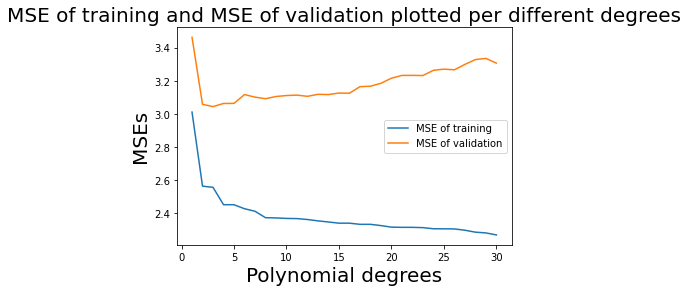

In [12]:


# Create two empty lists to store training and validation MSEs
training_error, validation_error = [],[]

for d in range(1,31): #30 included


    # Compute the polynomial features for the current degree 
    # for the train set
    x_poly_train = PolynomialFeatures(degree = d, include_bias= False).fit_transform(x_train) # bias = False will take the intercepts away

    # Compute the polynomial features for the validation set
    x_poly_val = PolynomialFeatures(degree = d, include_bias= False).fit_transform(x_val)
    
    # Initialize a linear regression model
    lreg = LinearRegression()

    # Fit the model on the train data
    lreg.fit(x_poly_train, y_train)
    
    # Use the trained model to predict on the transformed train data
    y_train_pred = lreg.predict(x_poly_train)

    # Use the trained model to predict on the transformed validation data
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the MSE on the train predictions
    training_error.append(mean_squared_error(y_train, y_train_pred))

    # Compute the MSE on the validation predictions
    validation_error.append(mean_squared_error(y_val, y_val_pred))
    
    
    
plt.plot(np.arange(1, 31), training_error, label = "MSE of training")
plt.plot(np.arange(1, 31), validation_error, label = "MSE of validation")
plt.xlabel("Polynomial degrees", size = 20)
plt.ylabel("MSEs", size = 20)
plt.title("MSE of training and MSE of validation plotted per different degrees", size = 20)
plt.legend()


#print(min(training_error))
#print(min(validation_error))

min_val = min(validation_error)
index_min = validation_error.index(min_val)
degree_value = index_min +1 

print("The model that has the smallest MSE value in the validation error is \n"
      "the model with", degree_value, "degrees. Its validation MSE is", min_val)

#print(validation_error[2])
#print(validation_error[14])

<div class='exercise-r'>

**3.2** Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). Report the train and test $MSE$ and add the test $MSE$ to `best_mse_dict`.

</div>

In [13]:
# your code here

y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 

#x_test =x_test.sort_values(['Spreading_factor'])

# include_bias = False , removes the column of ones because the linear regression adds it later for the intercepts

x_poly_train = PolynomialFeatures(degree = 3, include_bias = False ).fit_transform(x_train)
x_poly_test  = PolynomialFeatures(degree = 3, include_bias = False ).fit_transform(x_test)
    
lr=LinearRegression()
lr.fit(x_poly_train, y_train)

y_pred_train = lr.predict(x_poly_train)
y_pred_test = lr.predict(x_poly_test)


test_3_2 = mean_squared_error(y_test, y_pred_test)
train_3_2 = mean_squared_error(y_train, y_pred_train)

print("The train MSE of this model is ",train_3_2, ". The test MSE of this model is ",test_3_2, "." )

best_mse_dict.update({'3.2': test_3_2})
best_mse_dict



The train MSE of this model is  2.6534065590397877 . The test MSE of this model is  2.6329096269583325 .


{'2.1': 2.65190565451496, '3.2': 2.6329096269583325}

<div class='exercise-r'>

**3.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from [Question 2](#part2solutions).

</div>

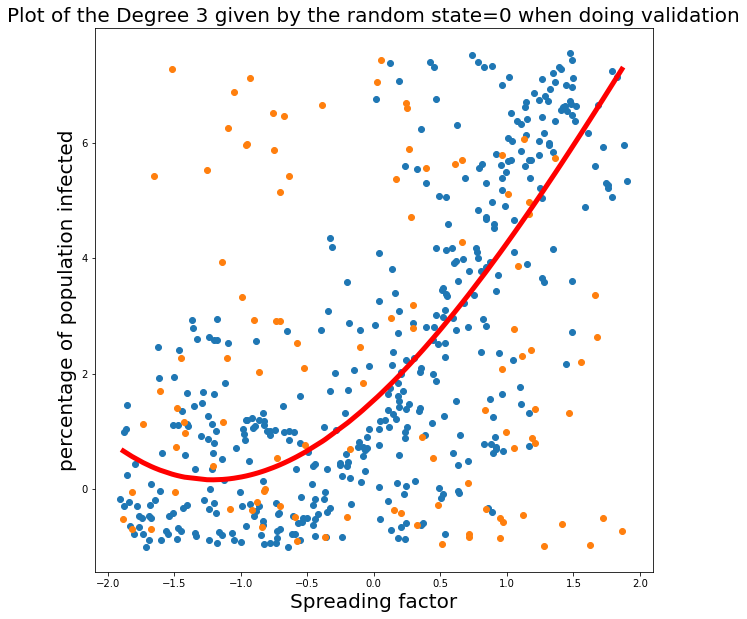

In [14]:
# your code here


df = pd.read_csv('data/bacteria_train.csv')
df_new = pd.read_csv('data/bacteria_test.csv')

y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population']#dataframe for brackets
x_test = df_new[['Spreading_factor']]

x_test =x_test.sort_values(['Spreading_factor'])

x_poly_train = PolynomialFeatures(degree = 3, include_bias = False ).fit_transform(x_train)
x_poly_test  = PolynomialFeatures(degree = 3, include_bias = False ).fit_transform(x_test)
    
lr=LinearRegression()
lr.fit(x_poly_train, y_train)

y_pred_train = lr.predict(x_poly_train)
y_pred_test = lr.predict(x_poly_test)



plt.figure(figsize = (10,10))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, 'r', linewidth = 5)
plt.title("Plot of the Degree 3 given by the random state=0 when doing validation", size = 20)
plt.ylabel("percentage of population infected", size =20)
plt.xlabel("Spreading factor", size = 20)
plt.show()


**INTERPRETATION:**

**With this random state it happens that it didn't change but if I use another random state it is possible that it can change.**


<a id="part4"></a>

## <div class='exercise'>Question 4: Finding the best model by k-fold cross validation [14 pts]</div> 

[Return to contents](#contents)

**4.1** In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation on the `bacteria_train.csv` dataset.

- Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values. Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 4.1 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

**4.2** Fit the best model on the entire training data and report the $MSE$.

- For the best degree polynomial regression identified in Question 4.1 above, train on the complete training set from the `bacteria_train.csv` file and predict on the test data.
- Report the coefficients of the model.
- Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.


**4.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 3](#part3solutions).


<a id="part4solutions"></a>

## Question 4: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**4.1** In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation on the `bacteria_train.csv` dataset.

- Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values. Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 4.1 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

</div>

In [15]:
# CROSS VALIDATION

df = pd.read_csv('data/bacteria_train.csv')
df_new = pd.read_csv('data/bacteria_test.csv')

y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 


# Create 2 empty lists to store cross-validation MSEs
cross_validation_error_val, cross_validation_error_train = [], []
std_val = []
std_train = []

for d in range(1,31):
    
    x_poly= PolynomialFeatures(degree = d, include_bias = False).fit_transform(x_train)

    lreg = LinearRegression()
    
    mse_score = cross_validate(lreg, x_poly, y_train, scoring =
     "neg_mean_squared_error", cv = 10, return_train_score= True)

    
    cross_validation_error_val.append(mse_score["test_score"].mean()*-1) 
    cross_validation_error_train.append(mse_score["train_score"].mean()*-1) 
    std_train.append(mse_score["train_score"].std()) 
    std_val.append(mse_score["test_score"].std()) 
    
    
array_std_v = np.array(std_val)
array_std_t = np.array(std_train)
array_m_v = np.array(cross_validation_error_val)
array_m_t = np.array(cross_validation_error_train)



In [16]:
mse_score.keys()
#std_val

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [17]:
#cross_validation_error_train

In [18]:
#cross_validation_error_val

The model that has the smallest average of MSEs values in the 10k fold cross-validation process is 
the model with 8 degrees. 
Its average MSE of 10 validation MSEs out of the of the 10fold-validation is 2.59907535119986 
Its average MSE of 10 train MSEs out of the of the 10fold-validation is 2.5081491803463067 



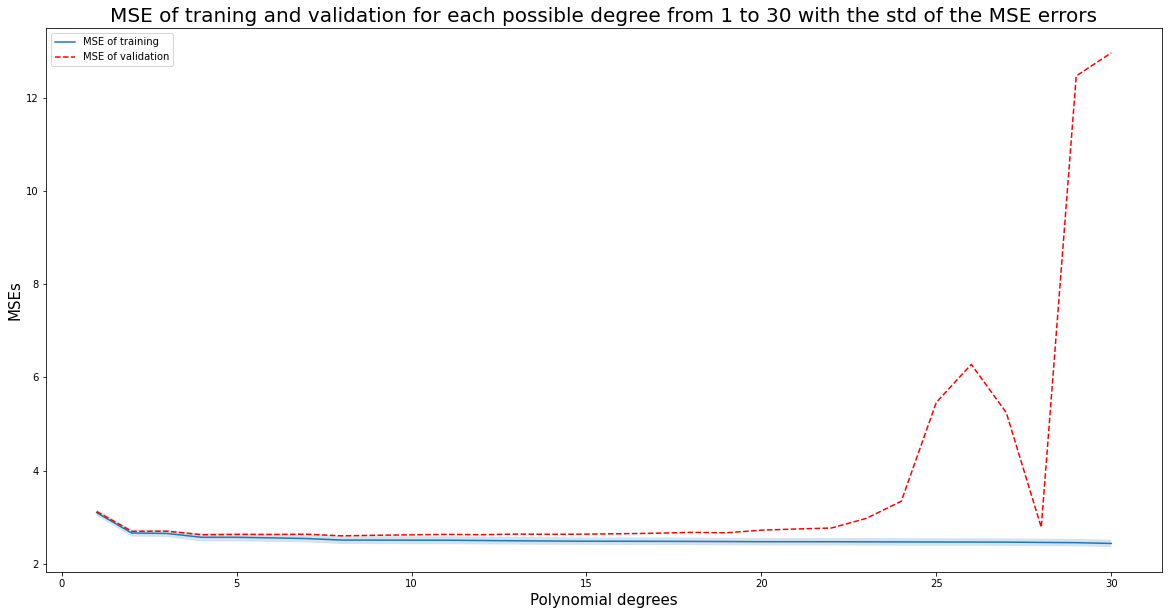

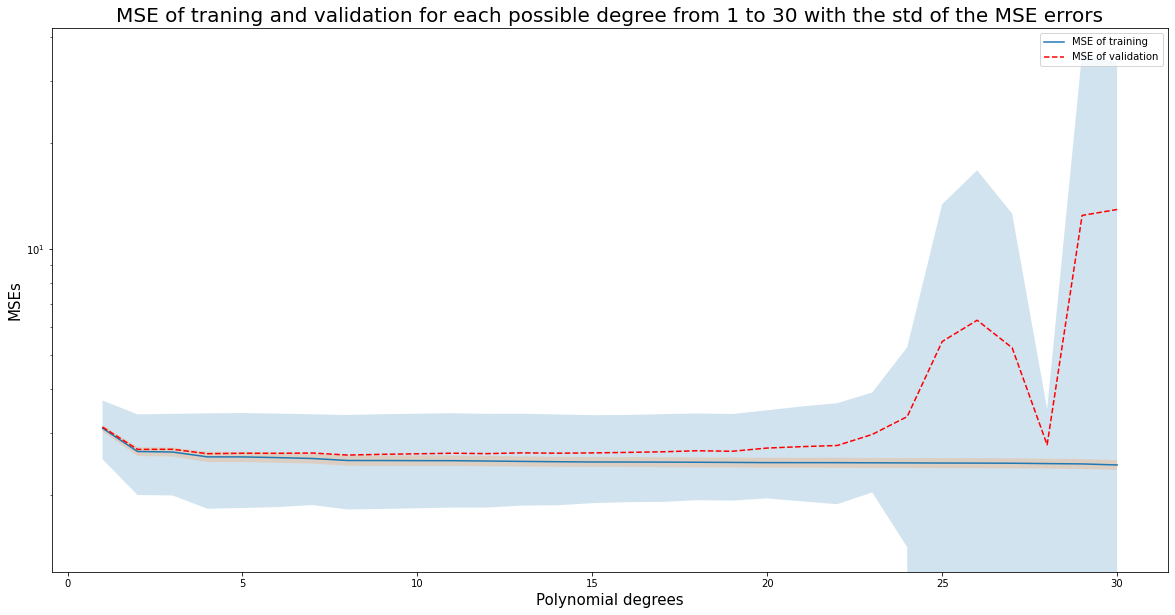

In [19]:

#std_train = np.std(cross_validation_error_train)
#std_val = np.std(cross_validation_error_val)
#print(std_train)
#print(std_val)   
plt.figure(figsize=(20,10))
    
plt.plot (np.arange(1, 31), cross_validation_error_train, label = "MSE of training")
plt.plot (np.arange(1, 31), cross_validation_error_val, 'r--', label = "MSE of validation")

#plt.fill_between(np.arange(1, 31), array_m_v-array_std_v ,array_m_v+array_std_v , alpha = 0.2)
plt.fill_between(np.arange(1, 31), array_m_t-array_std_t ,array_m_t+array_std_t, alpha = 0.2 )


plt.xlabel("Polynomial degrees", size = 15)
plt.ylabel("MSEs", size = 15)
plt.title("MSE of traning and validation for each possible degree from 1 to 30 with the std of the MSE errors", size = 20)
#plt.yscale("log")
plt.legend()

plt.figure(figsize=(20,10))
    
plt.plot (np.arange(1, 31), cross_validation_error_train, label = "MSE of training")
plt.plot (np.arange(1, 31), cross_validation_error_val, 'r--', label = "MSE of validation")

plt.fill_between(np.arange(1, 31), array_m_v-array_std_v ,array_m_v+array_std_v , alpha = 0.2)
plt.fill_between(np.arange(1, 31), array_m_t-array_std_t ,array_m_t+array_std_t, alpha = 0.2 )


plt.xlabel("Polynomial degrees", size = 15)
plt.ylabel("MSEs", size = 15)
plt.title("MSE of traning and validation for each possible degree from 1 to 30 with the std of the MSE errors", size = 20)
plt.yscale("log")
plt.legend()




    
min_val = min(cross_validation_error_val)
index_min = cross_validation_error_val.index(min_val)
degree_number = index_min + 1

print("The model that has the smallest average of MSEs values in the 10k fold cross-validation process is \n"
      "the model with", degree_number, "degrees. \n"
      "Its average MSE of 10 validation MSEs out of the of the 10fold-validation is", min_val, "\n"
      "Its average MSE of 10 train MSEs out of the of the 10fold-validation is", cross_validation_error_train[7], "\n")

**INTERPRETATION:**

**The std of the training error is very small compared to the std deviation of the validation error. The validation error varies more. Additionally, the validation errors are higher for models with 20 degrees and above. This means that if we use degrees above 20 we are overfitting the data.**


<div class='exercise-r'>

**4.2** Fit the best model on the entire training data and report the $MSE$.

- For the best degree polynomial regression identified in Question 4.1 above, train on the complete training set from the `bacteria_train.csv` file and predict on the test data.
- Report the coefficients of the model.
- Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.

</div>

In [20]:
# your code here


df = pd.read_csv('data/bacteria_train.csv')
df_new = pd.read_csv('data/bacteria_test.csv')

y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 



x_poly_train = PolynomialFeatures(degree = 8, include_bias = False).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree = 8, include_bias = False).fit_transform(x_test)
    
lr=LinearRegression()
lr.fit(x_poly_train, y_train)

y_pred_train = lr.predict(x_poly_train)
y_pred_test = lr.predict(x_poly_test)

print("These are the coefficients of the model" , lr.coef_)
print("This is the intercept of the model" , lr.intercept_)



test_3_1 = mean_squared_error(y_test, y_pred_test)
train_3_1 = mean_squared_error(y_train, y_pred_train)

print("The train MSE of this model is ",train_3_1, ". The test MSE of this model is ",test_3_1, "." )

best_mse_dict.update({'4.2': test_3_1})


print(best_mse_dict)



These are the coefficients of the model [ 2.59702778 -1.09486847 -1.18913441  3.48314914  0.65287664 -1.71300787
 -0.11530516  0.24041837]
This is the intercept of the model 1.5353335725001338
The train MSE of this model is  2.5125174574727875 . The test MSE of this model is  2.6130106373530166 .
{'2.1': 2.65190565451496, '3.2': 2.6329096269583325, '4.2': 2.6130106373530166}


<div class='exercise-r'>

**4.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 3](#part3solutions).

</div>

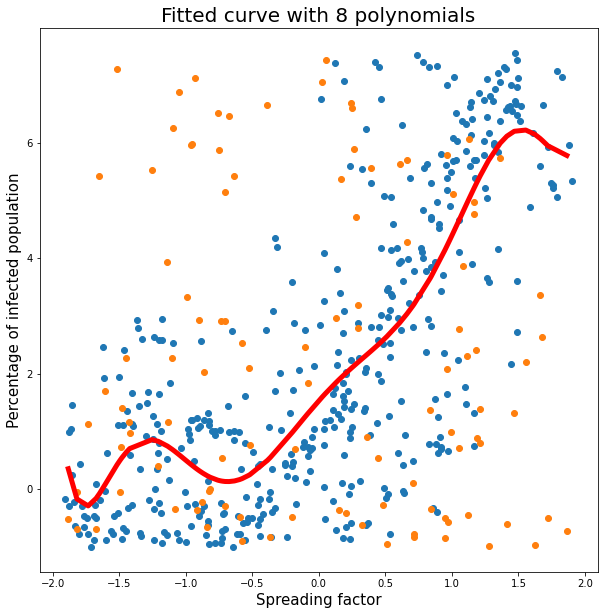

In [21]:
# your code here

df = pd.read_csv('data/bacteria_train.csv')
df_new = pd.read_csv('data/bacteria_test.csv')


y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 

x_test =x_test.sort_values(['Spreading_factor'])

x_poly_train = PolynomialFeatures(degree = 8, include_bias = False).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree = 8, include_bias = False).fit_transform(x_test)
    
lr=LinearRegression()
lr.fit(x_poly_train, y_train)

y_pred_train = lr.predict(x_poly_train)
y_pred_test = lr.predict(x_poly_test)


plt.figure(figsize = (10,10))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, 'r', linewidth = 5)
plt.title("Fitted curve with 8 polynomials", size = 20)
plt.ylabel("Percentage of infected population", size = 15)
plt.xlabel("Spreading factor", size = 15)
plt.show()



**INTERPRETATION:**

**Here we are cross validating with 10 folds, i.e. 10 times, which means that we are looking at multiple points of view, i.e. multiple validation sets. By comparing 10 points of view and 10 validation datasets, we have a higher degree as being the best degree. This seems to fit the data with more details taken into consideration.**

**The degree here is 8, and it's higher than the preious one, 3. This degree 8 is fitting more the patterns of the data compared to the previous one. Hence, it looks like that the degree 8 overfits the data compared to degree 3.**


<a id="part5"></a>

## <div class='exercise'>Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]</div> 

[Return to contents](#contents)

**5.1** In the previous part, we used $k$-fold cross validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps in [Question 2.2](#part2) to estimate the confidence intervals of our $\beta_i$ values. In this segment, we will use bootstrapping to test the robustness of our estimation. As before, we use the `bacteria_train.csv` data to train the model and `bacteria_test.csv` to test the model.

- Similar to Question 2.2, run **at least 100 bootstraps** of your data.
- For each bootstrap:
  - Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
  - Select the best cross-validated degree polynomial regression based on lowest mean validation $MSE$ and store that best degree to a list.
- After completing your bootstraps, you should have a list of "best degree" numbers, one degree for each completed bootstrap.
- Generate a bar plot, with the polynomial degree on the $x$-axis and the number of times that degree was deemed best on the $y$-axis, using the “best degree” numbers saved during your bootstraps.

**NOTE:** Once complete, your code for this problem will likely take several minutes to execute. This is to be expected.

**5.2** What are your observations? 

- Why do you see so much variation in the "best degree" over the bootstraps?
- Which degree polynomial regression will you choose as your overall best degree based on your bootstrapped results, and why? 

**5.3** Now, with the overall best degree identified with your bootstrapping results above, train the polynomial regression model on the **complete training set**. Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.

**5.4** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your cross-validated model from [Question 4](#part4solutions).

<a id="part5solutions"></a>

## Question 5: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**5.1** In the previous part, we used $k$-fold cross validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps in [Question 2.2](#part2) to estimate the confidence intervals of our $\beta_i$ values. In this segment, we will use bootstrapping to test the robustness of our estimation. As before, we use the `bacteria_train.csv` data to train the model and `bacteria_test.csv` to test the model.

- Similar to Question 2.2, run **at least 100 bootstraps** of your data.
- For each bootstrap:
  - Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
  - Select the best cross-validated degree polynomial regression based on lowest mean validation $MSE$ and store that best degree to a list.
- After completing your bootstraps, you should have a list of "best degree" numbers, one degree for each completed bootstrap.
- Generate a bar plot, with the polynomial degree on the $x$-axis and the number of times that degree was deemed best on the $y$-axis, using the “best degree” numbers saved during your bootstraps.

**NOTE:** Once complete, your code for this problem will likely take several minutes to execute. This is to be expected.

</div>

In [22]:
# your code here


df = pd.read_csv('data/bacteria_train.csv')
df_new = pd.read_csv('data/bacteria_test.csv')

y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 


def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df

numberOfBootstraps = 100

best_d_for_bootstrap = []

# Loop over the number of bootstraps
for i in range(numberOfBootstraps):
    
    bootstrapped_data = bootstrap(df) 
    y_train = bootstrapped_data['Perc_population']
    x_train = bootstrapped_data[['Spreading_factor']]
    
    # To iterate over the range, select the maximum degree of the polynomial
    maxdeg = 30

    # Create three empty lists to store training, validation and cross-validation MSEs
    cross_validation_error_val = []
    cross_validation_error_train = []

    # Loop through the degrees of the polynomial to create different models
    #for d in range(len(maxdeg)):
    for d in range(1,31):

        # Compute the polynomial features for the current degree 
        # for the train set
        x_poly_train = PolynomialFeatures(degree = d, include_bias=False).fit_transform(x_train)

        lreg = LinearRegression(fit_intercept=True)

        mse_score_train = cross_validate(lreg, x_poly_train, y_train, scoring =
         "neg_mean_squared_error", cv = 10, return_train_score= True) #tr#false #it s the absolute mean squared error #### =False, returns the validation score
        ### = true, returns 2 columns, 
        # test core is the validation score
        # train score is the train score  ### LATER IN LASSO DO = TRUE SO YOU GET 2 COLUMSN
 
        mean_per_degree_validation = mse_score_train["test_score"].mean()*-1
        mean_per_degree_train = mse_score_train["train_score"].mean()*-1

        cross_validation_error_val.append(mean_per_degree_validation) #we need positive numbers #i have a mean MSE for each degree, i.e. 30 in total
        cross_validation_error_train.append(mean_per_degree_train)
    
    cross_validation_error_val
    cross_validation_error_train
    
    #which degree was best 
    
    min_val = min(cross_validation_error_val)
    index_min = cross_validation_error_val.index(min_val)
    index_min #the degree but index +1, so the degree "7" is actually degree 8 
    degree_number = index_min +1 
    
    best_d_for_bootstrap.append(degree_number)
    

best_d_for_bootstrap
print(best_d_for_bootstrap)
len(best_d_for_bootstrap)



    




[17, 14, 4, 8, 10, 15, 8, 18, 8, 8, 8, 4, 11, 8, 8, 5, 4, 8, 4, 8, 10, 16, 4, 15, 15, 22, 12, 8, 12, 15, 15, 19, 6, 13, 8, 15, 8, 8, 6, 14, 4, 4, 8, 8, 15, 9, 23, 8, 9, 8, 8, 8, 14, 14, 8, 13, 8, 11, 8, 17, 13, 22, 12, 14, 8, 4, 16, 8, 13, 4, 9, 10, 13, 21, 8, 12, 8, 8, 8, 15, 8, 14, 8, 8, 9, 13, 9, 8, 14, 15, 13, 12, 12, 8, 8, 14, 8, 10, 10, 8]


100

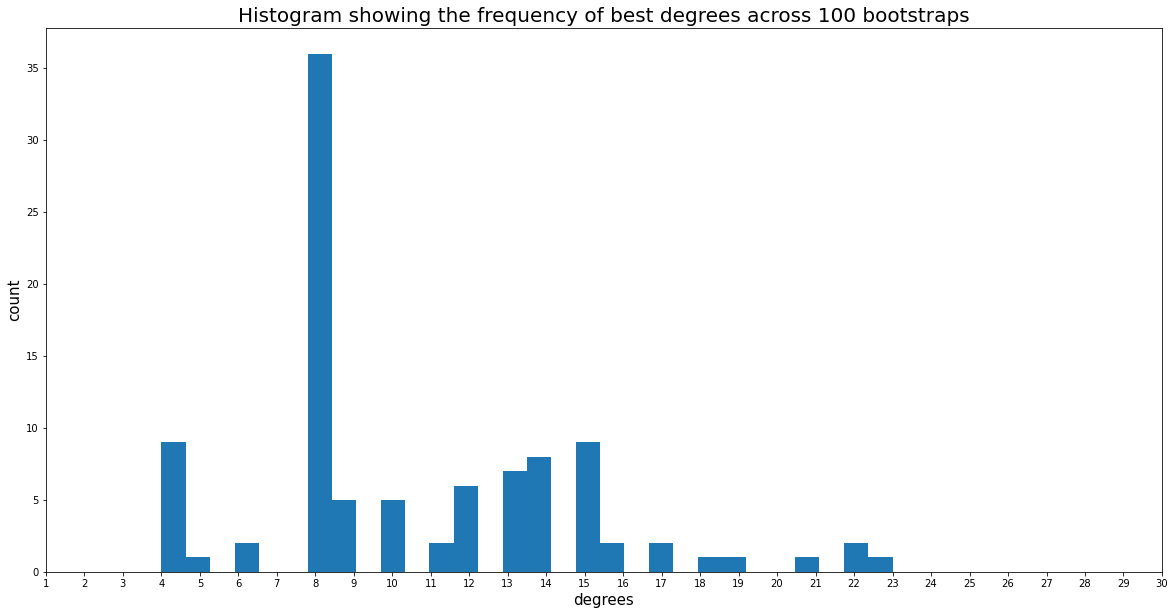

In [23]:

plt.figure(figsize=(20,10))
plt.hist(best_d_for_bootstrap, bins = 30)
plt.title("Histogram showing the frequency of best degrees across 100 bootstraps", size = 20)
plt.ylabel("count", size = 15)
plt.xlabel("degrees", size=15)
plt.xticks(np.arange(1,31,1))
plt.show()


<div class='exercise-r'>

**5.2** What are your observations? 

- Why do you see so much variation in the "best degree" over the bootstraps?
- Which degree polynomial regression will you choose as your overall best degree based on your bootstrapped results, and why? 


</div>

**We see so much variation because we are every time at every bootstrap getting a random parallel universe.**

**The best overall degree is the one that comes more often, i.e. degree 8. This is the case beacuase if we run often enough this random sampling method, and we see that one comes up more often, then if this comes systematically up as the best one, it means that this must also have a robust reason to be used.**


<div class='exercise-r'>

**5.3** Now, with the overall best degree identified with your bootstrapping results above, train the polynomial regression model on the **complete training set**. Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.

</div>

In [24]:
# your code here

#### degree 3

df = pd.read_csv('data/bacteria_train.csv')
df_new = pd.read_csv('data/bacteria_test.csv')

y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 

x_poly_train = PolynomialFeatures(degree = 8, include_bias = False).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree = 8, include_bias = False).fit_transform(x_test)
    
lr=LinearRegression()
lr.fit(x_poly_train, y_train)

y_pred_train = lr.predict(x_poly_train)
y_pred_test = lr.predict(x_poly_test)

test_5_3 = mean_squared_error(y_test, y_pred_test)
train_5_3 = mean_squared_error(y_train, y_pred_train)

print("The train MSE of this model is ",train_5_3, ". The test MSE of this model is ",test_5_3, "." )

best_mse_dict.update({'5.3': test_5_3})

print(best_mse_dict)

The train MSE of this model is  2.5125174574727875 . The test MSE of this model is  2.6130106373530166 .
{'2.1': 2.65190565451496, '3.2': 2.6329096269583325, '4.2': 2.6130106373530166, '5.3': 2.6130106373530166}


<div class='exercise-r'>

**5.4** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your cross-validated model from [Question 4](#part4solutions).

</div>

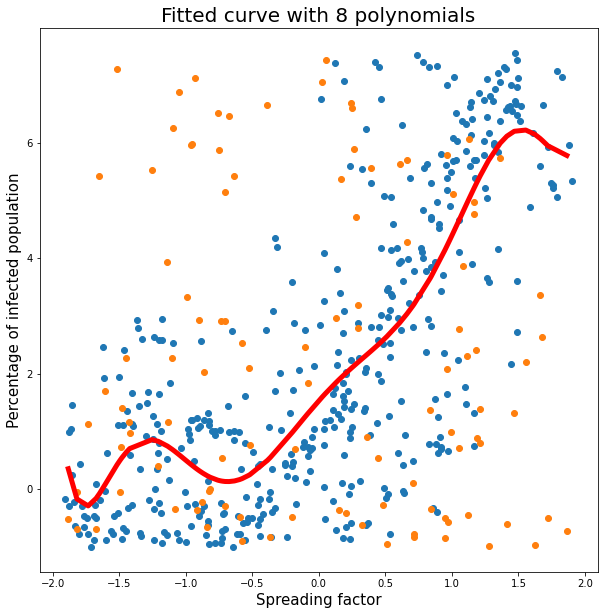

In [25]:



df = pd.read_csv('data/bacteria_train.csv')
df_new = pd.read_csv('data/bacteria_test.csv')

y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 

x_test =x_test.sort_values(['Spreading_factor'])

x_poly_train = PolynomialFeatures(degree = 8, include_bias = False).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree = 8, include_bias = False).fit_transform(x_test)
    
lr=LinearRegression()
lr.fit(x_poly_train, y_train)

y_pred_train = lr.predict(x_poly_train)
y_pred_test = lr.predict(x_poly_test)

plt.figure(figsize = (10,10))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, 'r', linewidth = 5)
plt.title("Fitted curve with 8 polynomials", size = 20)
plt.ylabel("Percentage of infected population", size = 15)
plt.xlabel("Spreading factor", size = 15)
plt.show()






**INTERPRETATION:**

**In question 5 I do cross validation with 10-folds within 100 bootstraps, whereas in question 4 I do just 1 round of validation. In both exercises I get the same value of degrees and the plots look the same. Also here it looks like it fits more the training data rather than the testing data, hence the model with degree 8 might have some sort of over-fitting.**


<a id="part6"></a>

## <div class='exercise'>Question 6: Improving model consistency with LASSO regularization [33 pts]</div> 

[Return to contents](#contents)

In the previous sections, we compared many polynomial models to find the best degree. For each model of degree $n$, we considered all polynomial coefficients *up to* **degree $n$** using `PolynomialFeatures(...)`. In this section we will consider polynomial features of $n=30$, and a **best model** that could be chosen from any possible combination of our 30 degrees.

For instance, we could choose a best model with an arbitrary set of polynomial degrees up degree 30, such as $x^i \in [x^1, x^5, x^{19}, x^{24}]$, rather than the standard approach of using *all* consecutive degrees up to our maximum degree $n=30$ as in $x^i \in [x^0, x^1, ... , x^{30}]$.

However, the total number of such possible models for $n=30$ is $2^{30}\approx10^9$, and searching through all of them would be laborious and computationally inefficient. Instead, we can use $LASSO$ (i.e. $L1$) regularization, which "switches off" highly unstable degree coefficients by shrinking them to zero (or very close to zero), thus giving us an efficient solution to this particular combinatorial challenge.

**6.1 Find the best hyper-parameter alpha, $\alpha$**

First, we will use cross validation to find the the best regularization parameter $\alpha$. As before, we use the `bacteria_train.csv` for cross validation.

- Use polynomial features with **degree 30**. 
- For each regularization parameter $\alpha$ in $\alpha \in [10^{-3}, 10^{-2}, 10^{-1}, 10^{0}, 10^{1}]$, perform scikit-learn's `Lasso(...)` regression using `cross_validate(...)` with `k=10`.
- Do not worry about normalizing your $x$ values for any parts of Question 6. It will not meaningfully affect our final results here.
- Generate a single plot showing the mean train and validation $MSE$ values for each regularization parameter $\alpha$, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Print the best $\alpha$ value, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.
- Did your $LASSO$ regression model generate any warnings while solving this problem? If so, what was that warning, what did it mean, what steps did you take to address the cause of this warning, and why might it be important to take those steps? (See the [NOTE](#part6note) at the bottom of Question 6 for some hints.)


**6.2 Find the most significant degrees**

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this best $\alpha$ value to find the "most significant" set of polynomial degrees by using bootstraps.

What we mean by this is, for each bootstrap of the data, you will get some set of degrees that are **significant**, as will be indicated by the value of their coefficients. Typically, while using $LASSO$ regularization, we would consider $\mid\beta_i\mid \gt 0$ as an indication of a particular coefficient's significance. However, for this particular exercise, we are going to use $\mid\beta_i\mid \gt 0.1$ as our criteria for significance (we have found this $0.1$ threshold to work well when designing this particular problem).

Based on this criteria, you will identify which degree coefficients are significant over many bootstrapped iterations with $n=30$ polynomial features and your chosen best $\alpha$ from Question 6.1.

- Use polynomial features with **degree 30**.
- Use a dictionary called `significant_degrees` to store a cumulative count for each degree identified as significant during your bootstraps.
- Run at least 100 bootstraps of your data.
- For each bootstrap:
  - Train a `Lasso(...)` model with the `best_alpha` identified in Question 6.1.
  - Identify the significant polynomial degree coefficients using $\mid\beta_i\mid \gt 0.1 $ as our threshold for significance.
  - For each significant coefficient, update the count of that degree in your `significant_degrees` dictionary.
- Generate a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
- Based on this plot, there should likely be a clear maximum degree, above which, few if any iterations have been identified as significant. Interpret your bar plot, choose a maximum degree polynomial based upon it, and explain your rationale for choosing that degree.


**6.3 Compute and print the test $MSE$**

From our Question 6.2 results, we can see that only some degrees are consistently significant over many bootstraps. You will now retrain the $L1$ regularized model on the entire **training** data and find the test $MSE$.

- Use polynomial features based on the maximum degree you identified using your results from Question 6.2 (for the sake of simplicity, use all degrees up to that maximum degree as is typically done in polynomial regression).
- Train your **LASSO** regularized model using your `best_alpha` hyper-parameter on the entire training set.
- Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)).
- Report the polynomial degrees and corresponding coefficients for this fully trained model that have an absolute value greater than 0.1 (i.e. $\mid\beta_i\mid \gt 0.1 $).
- Report the train and test $MSE$ and save the test $MSE$ to `best_mse_dict`.

**6.4 What are your observations?**

- Compare your `best_degree` from [Question 5](#part5solutions) with your chosen degree in 6.3 above and comment on the difference.
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Which degree coefficients in your best fit model from 6.3 are significant? If not all coefficients are significant, why?
- Would you expect your current model from 6.3 to be more "reliable" or robust than the models in Question 5 and prior? On what basis would you make a claim of its robustness?

<a id="part6note"></a>

**NOTE:**
- Once complete, your code for 6.1 and 6.2 will likely take several minutes to execute. This is to be expected.
- You will also likely receive `ConvergenceWarning` messages as your $LASSO$ regression models are trained.
  - Try resolving this warning by increasing your $LASSO$ models' maximum iterations by between 20-times to 100-times greater than scikit-learn's default number of iterations for its `Lasso(...)` implementation.
  - If that fails to resolve this warning, feel free to also uncomment the [IPython cell magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-capture) provided at the top the code cell (i.e. `%%capture --no-stdout --no-display`) to silence the warning.
  - Please note that using a `%%capture` cell magic such as this is a good alternative to using Python's native `warnings.filterwarnings(...)` when working in a Jupyter notebook, because it helps to ensure you don't accidentally silence important warnings in other parts of your notebook.


<a id="part6solutions"></a>

## Question 6: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**6.1 Find the best hyper-parameter alpha, $\alpha$**

First, we will use cross validation to find the the best regularization parameter $\alpha$. As before, we use the `bacteria_train.csv` for cross validation.

- Use polynomial features with **degree 30**. 
- For each regularization parameter $\alpha$ in $\alpha \in [10^{-3}, 10^{-2}, 10^{-1}, 10^{0}, 10^{1}]$, perform scikit-learn's `Lasso(...)` regression using `cross_validate(...)` with `k=10`.
- Do not worry about normalizing your $x$ values for any parts of Question 6. It will not meaningfully affect our final results here.
- Generate a single plot showing the mean train and validation $MSE$ values for each regularization parameter $\alpha$, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Print the best $\alpha$ value, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.
- Did your $LASSO$ regression model generate any warnings while solving this problem? If so, what was that warning, what did it mean, what steps did you take to address the cause of this warning, and why might it be important to take those steps? (See the [NOTE](#part6note) at the bottom of Question 6 for some hints.)

</div>

In [26]:
# %%capture --no-stdout --no-display

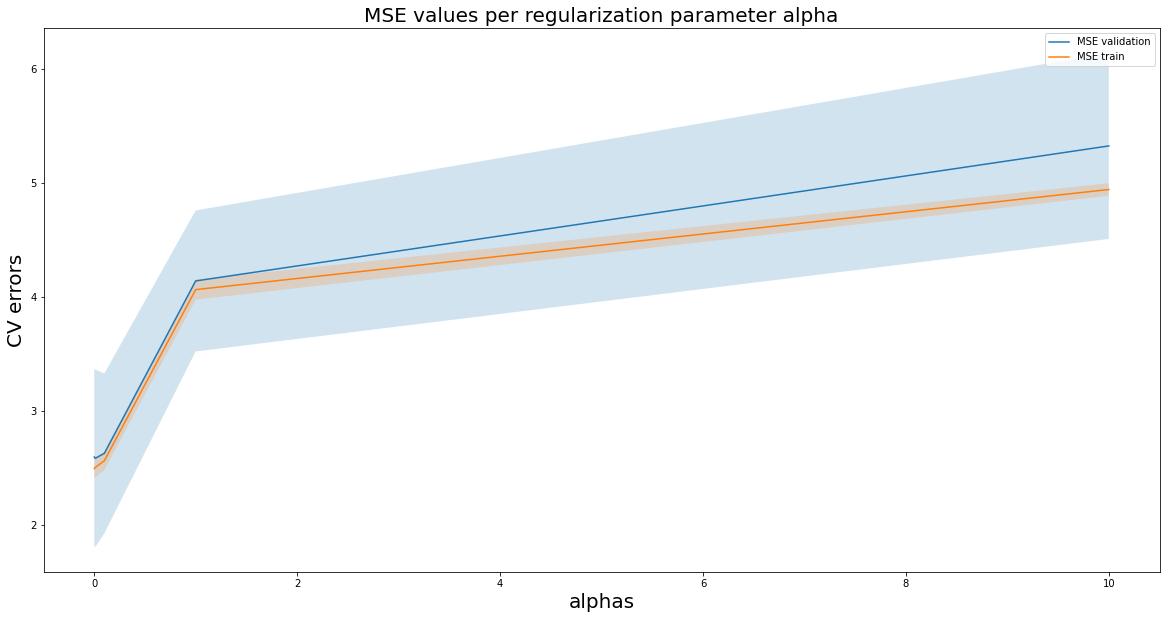

In [27]:
%%capture --no-stdout --no-display


y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 

alpha_list = [0.001, 0.01, 0.1, 1, 10]

x_poly= PolynomialFeatures(degree = 30, include_bias = False).fit_transform(x_train)

cross_validation_error_val = []
cross_validation_error_train = []
std_train_values = []
std_val_values = []

# Loop over all the alpha values
for i in alpha_list:

    # Initialize a Lasso regression model with the current alpha
    # Set normalize as True
    lasso_reg = Lasso(alpha=i, max_iter=20000) #, normalize=True)

    mse_score = cross_validate(lasso_reg, x_poly, y_train, scoring =
     "neg_mean_squared_error", cv = 10, return_train_score= True) 
    
    cross_validation_error_val.append(mse_score["test_score"].mean()*-1) 
    cross_validation_error_train.append(mse_score["train_score"].mean()*-1) 
    std_train_values.append(mse_score["train_score"].std()*-1) 
    std_val_values.append(mse_score["test_score"].std()*-1) 

std_train = np.std(cross_validation_error_train)
std_val = np.std(cross_validation_error_val)

array_std_v = np.array(std_val_values)
array_std_t = np.array(std_train_values)
array_m_v = np.array(cross_validation_error_val)
array_m_t = np.array(cross_validation_error_train)

plt.figure(figsize=(20,10))
plt.plot(alpha_list, cross_validation_error_val, label = "MSE validation")
plt.plot(alpha_list, cross_validation_error_train, label = "MSE train")

plt.fill_between(alpha_list, array_m_v-array_std_v ,array_m_v+array_std_v , alpha = 0.2)
plt.fill_between(alpha_list, array_m_t-array_std_t ,array_m_t+array_std_t, alpha = 0.2 )


#plt.errorbar(alpha_list, cross_validation_error_val, std_val)
plt.xlabel("alphas", size =20)
plt.ylabel("CV errors", size = 20)
plt.title("MSE values per regularization parameter alpha", size = 20)
#plt.yscale("log")
#plt.xscale("log")
plt.legend()
plt.show()



In [28]:
print(cross_validation_error_val)
print(cross_validation_error_train)

[2.595844311791473, 2.584282148179919, 2.6276222935283395, 4.142445066115411, 5.328431558550726]
[2.4948543802989462, 2.5036215651087255, 2.5637284626591077, 4.066262360923621, 4.94558544033013]


In [29]:

    
min_val = min(cross_validation_error_val)
index_min = cross_validation_error_val.index(min_val)
best_alpha = alpha_list[index_min]

print("The model that has the smallest average of MSEs values in the Lasso model selection with Cross Validation is \n"
      "the model with", best_alpha, " as hyper parameter alpha. \n"
      "Its average MSE of 10 validation MSEs out of the of the 10fold-validation is", min_val, "\n"
      "Its average MSE of 10 train MSEs out of the of the 10fold-validation is", cross_validation_error_train[index_min], "\n")

The model that has the smallest average of MSEs values in the Lasso model selection with Cross Validation is 
the model with 0.01  as hyper parameter alpha. 
Its average MSE of 10 validation MSEs out of the of the 10fold-validation is 2.584282148179919 
Its average MSE of 10 train MSEs out of the of the 10fold-validation is 2.5036215651087255 



**INTERPRETATION:**

**Without the magic cell line I get several convergence warnings. These warned me that many betas were converging to 0. This makes sense because LASSO does model selection. Meaning, it can send the variables that are not useful to predict the data to 0, i.e. it selects the useful variables for me - i.e. model selection.**


<div class='exercise-r'>

**6.2 Find the most significant degrees**

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this best $\alpha$ value to find the "most significant" set of polynomial degrees by using bootstraps.

What we mean by this is, for each bootstrap of the data, you will get some set of degrees that are **significant**, as will be indicated by the value of their coefficients. Typically, while using $LASSO$ regularization, we would consider $\mid\beta_i\mid \gt 0$ as an indication of a particular coefficient's significance. However, for this particular exercise, we are going to use $\mid\beta_i\mid \gt 0.1$ as our criteria for significance (we have found this $0.1$ threshold to work well when designing this particular problem).

Based on this criteria, you will identify which degree coefficients are significant over many bootstrapped iterations with $n=30$ polynomial features and your chosen best $\alpha$ from Question 6.1.

- Use polynomial features with **degree 30**.
- Use a dictionary called `significant_degrees` to store a cumulative count for each degree identified as significant during your bootstraps.
- Run at least 100 bootstraps of your data.
- For each bootstrap:
  - Train a `Lasso(...)` model with the `best_alpha` identified in Question 6.1.
  - Identify the significant polynomial degree coefficients using $\mid\beta_i\mid \gt 0.1 $ as our threshold for significance.
  - For each significant coefficient, update the count of that degree in your `significant_degrees` dictionary.
- Generate a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
- Based on this plot, there should likely be a clear maximum degree, above which, few if any iterations have been identified as significant. Interpret your bar plot, choose a maximum degree polynomial based upon it, and explain your rationale for choosing that degree.

</div>

In [30]:

counts_list = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(len(counts_list))

#type(counts_list)
##elements = counts_list[2]
#new = elements + 1
#counts_list[2] = new
#counts_list[2]

30


In [31]:
%%capture --no-stdout --no-display


y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 


def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df

numberOfBootstraps = 100

best_d_for_bootstrap = []

x_poly= PolynomialFeatures(degree = 30, include_bias = False).fit_transform(x_train)

dictionary_betas = {}
keys = range(30)

test_list_coefficients = []

# Loop over the number of bootstraps
for i in range(numberOfBootstraps):
    
    bootstrapped_data = bootstrap(df) 
    y_train = bootstrapped_data['Perc_population']
    x_train = bootstrapped_data[['Spreading_factor']]
    
    lasso_reg = Lasso(alpha=0.01, max_iter=20000) #, normalize=True)
    x_poly= PolynomialFeatures(degree = 30, include_bias = False).fit_transform(x_train)


    # Fit on the transformed data
    lasso_reg.fit(x_poly, y_train)
    
    # Append the coeff_list with the coefficients of the model
    list_coefficients = lasso_reg.coef_
    
    test_list_coefficients.append(list_coefficients)


    for l, j in enumerate(list_coefficients):
        if j > 0.1:
            
            #value = counts_list[l] 
            #new_value = value + 1 
            #counts_list[l] = new_value
            paramenter = l+1
            
            counts_list[l] +=1
            
            dictionary_betas[paramenter] = counts_list[l]
        
    

    
dictionary_betas


{1: 100, 6: 66, 2: 27, 4: 66, 5: 1, 3: 4, 9: 7, 8: 3, 7: 3}

In [32]:
#test_list_coefficients

In [33]:
new_test_data = pd.DataFrame(test_list_coefficients)
(new_test_data>0.1)
(new_test_data>0.1).sum()




0     100
1      27
2       4
3      66
4       1
5      66
6       3
7       3
8       7
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
dtype: int64

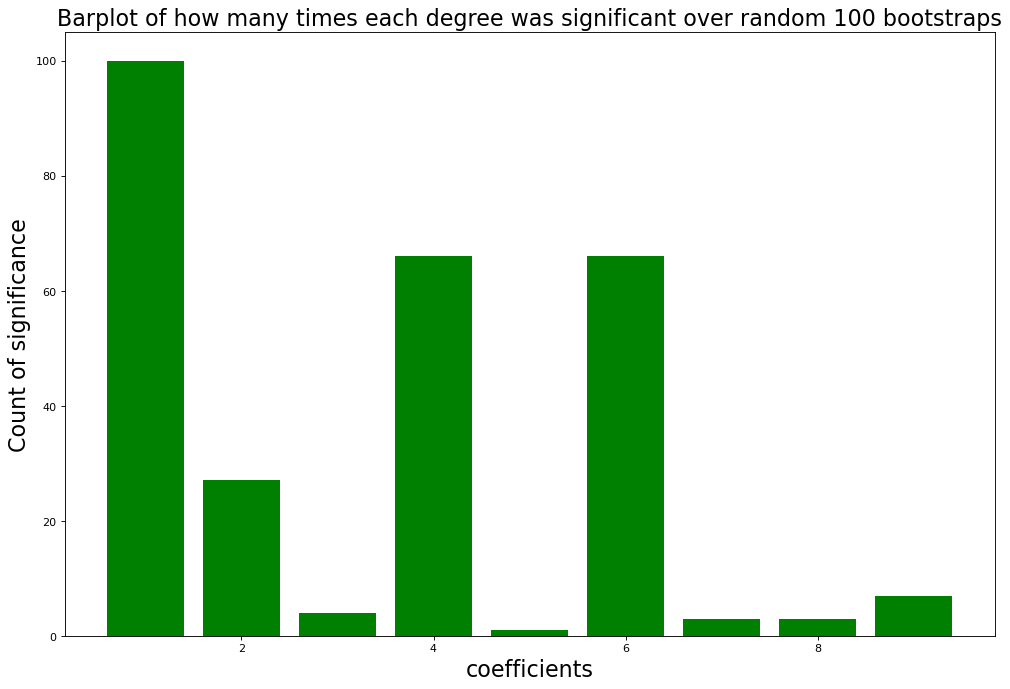

In [34]:

plt.figure(figsize = (15,10), dpi=80)
plt.bar(list(dictionary_betas.keys()), dictionary_betas.values(), color='g')
plt.title("Barplot of how many times each degree was significant over random 100 bootstraps", size =20)
plt.xlabel("coefficients", size =20)
plt.ylabel("Count of significance", size =20)
plt.show()

**INTERPRETATION:**

**The coefficient that has most significance is 1. The degree with the second-highest significance is 4 and 6. After these, the other coefficients are less if not significant at all. After degree of 9 (9 included), I see no significance at all. The first 9 degrees show significance, as a consequence I am going to choose 9 so that to include all degrees that have some sort of significance. After this, I can let LASSO decide which ones of these 9 are more useful, but it is good to start with at least these 9 because all of these show some sort of significance.**


<div class='exercise-r'>

**6.3 Compute and print the test $MSE$**

From our Question 6.2 results, we can see that only some degrees are consistently significant over many bootstraps. You will now retrain the $L1$ regularized model on the entire **training** data and find the test $MSE$.

- Use polynomial features based on the maximum degree you identified using your results from Question 6.2 (for the sake of simplicity, use all degrees up to that maximum degree as is typically done in polynomial regression).
- Train your **LASSO** regularized model using your `best_alpha` hyper-parameter on the entire training set.
- Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)).
- Report the polynomial degrees and corresponding coefficients for this fully trained model that have an absolute value greater than 0.1 (i.e. $\mid\beta_i\mid \gt 0.1 $).
- Report the train and test $MSE$ and save the test $MSE$ to `best_mse_dict`.

</div>

In [35]:
# your code here

df = pd.read_csv('data/bacteria_train.csv')
df_new = pd.read_csv('data/bacteria_test.csv')


y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 

x_poly= PolynomialFeatures(degree = 9, include_bias = False).fit_transform(x_train)
lasso_reg = Lasso(alpha=0.01, max_iter=20000) #, normalize=True)

# Fit on the transformed data
lasso_reg.fit(x_poly, y_train)

# Append the coeff_list with the coefficients of the model
list_coefficients = lasso_reg.coef_

x_poly_train = PolynomialFeatures(degree = 9, include_bias = False).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree = 9, include_bias = False).fit_transform(x_test)

y_test_pred =lasso_reg.predict(x_poly_test)
y_train_pred =lasso_reg.predict(x_poly_train)

mse_test = mean_squared_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

best_mse_dict.update({'6.3': mse_test})



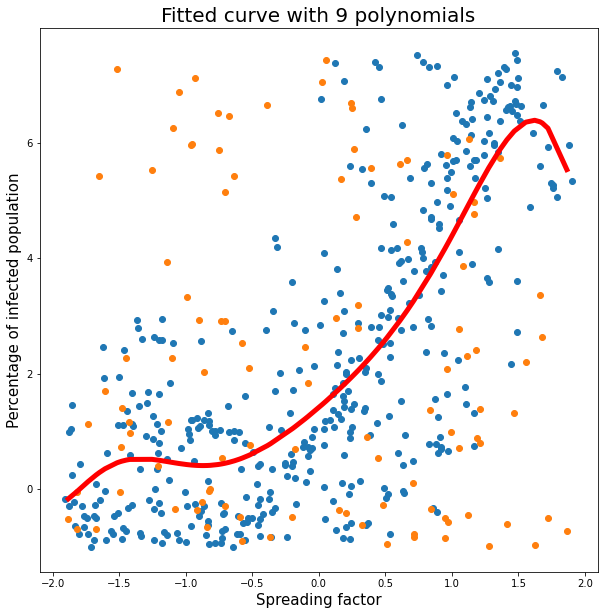

In [36]:


df = pd.read_csv('data/bacteria_train.csv')
df_new = pd.read_csv('data/bacteria_test.csv')


y_train = df['Perc_population'] #dataframe for brackets
x_train = df[['Spreading_factor']]

y_test = df_new['Perc_population'] #dataframe for brackets
x_test = df_new[['Spreading_factor']] 

x_test =x_test.sort_values(['Spreading_factor'])


x_poly_train = PolynomialFeatures(degree = 9, include_bias = False).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree = 9, include_bias = False).fit_transform(x_test)
                                 
lasso_reg = Lasso(alpha=0.01, max_iter=20000) #, normalize=True)

# Fit on the transformed data
lasso_reg.fit(x_poly_train, y_train)

y_test_pred =lasso_reg.predict(x_poly_test)



# Append the coeff_list with the coefficients of the model
list_coefficients = lasso_reg.coef_
##1 or 2 or 3???

plt.figure(figsize = (10,10))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r', linewidth = 5)
plt.title("Fitted curve with 9 polynomials", size = 20)
plt.ylabel("Percentage of infected population", size = 15)
plt.xlabel("Spreading factor", size = 15)
plt.show()




In [37]:
for coefficient,  i in enumerate(list_coefficients):
    if i>0.1:
        print("This coefficient, i.e. beta", coefficient +1," i.e. the coefficient of degree", coefficient +1," is significant. Its value is:", i,". This is higher than 0.1")
        
        

This coefficient, i.e. beta 1  i.e. the coefficient of degree 1  is significant. Its value is: 1.9754972296396736 . This is higher than 0.1
This coefficient, i.e. beta 2  i.e. the coefficient of degree 2  is significant. Its value is: 0.5914268990064192 . This is higher than 0.1
This coefficient, i.e. beta 4  i.e. the coefficient of degree 4  is significant. Its value is: 0.6844317204379547 . This is higher than 0.1


In [38]:
list_coefficients


array([ 1.97549723,  0.5914269 , -0.        ,  0.68443172, -0.        ,
       -0.31213098,  0.00931847,  0.02784689, -0.00581426])

In [39]:
best_mse_dict

{'2.1': 2.65190565451496,
 '3.2': 2.6329096269583325,
 '4.2': 2.6130106373530166,
 '5.3': 2.6130106373530166,
 '6.3': 2.594421570312363}

<div class='exercise-r'>

**6.4 What are your observations?**

- Compare your `best_degree` from [Question 5](#part5solutions) with your chosen degree in 6.3 above and comment on the difference.
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Which degree coefficients in your best fit model from 6.3 are significant? If not all coefficients are significant, why?
- Would you expect your current model from 6.3 to be more "reliable" or robust than the models in Question 5 and prior? On what basis would you make a claim of its robustness?

</div>

**In question 5, I chose 8 because it was the degree that was repeatedly shown significance across 100 bootstraps. Here, I pick a polynomial of 9 and I let the LASSO decide which ones are important. The MSE of the LASSO is smaller compared to 5.3 because LASSO sends some values, some coefficients close to 0 if not to completely 0.  LASSO decided that the degrees 1, 2 and 4 are significant. Not all of them are significant because LASSO performed model selection for us by putting a penalty term to make sure that the model is not overfitting the training dataset. This ensures that the training data is not overfit and ensures that the model is focused on the important trends of the data and not on the details. This ensures better prediction. This is the reason why our validation MSE in 6.3 is better than the validation MSE of 5.3. Our model in 6.3 predicts better than the model in 5.3**

**I think that this model from 6.3 with LASSO is more reliable, because this one chooses the coefficients that are essential (only what is significant). The LASSO is going to choose only what is essential to describe the training data, just enough to predict the validation (and later test data). This can be seen by the fact that we get a smaller MSE in 6.3 compared to 5.3; as expected.**


<a id="part7"></a>

## <div class='exercise'>Question 7: Analyze your best test MSEs for each sub section of the homework [6 pts]</div> 

[Return to contents](#contents)


**7.1** Convert the `best_mse_dict` dictionary used to store the best $MSE$ values from each section of the homework into a Pandas dataframe. Generate a bar plot illustrating the $MSE$ values in that dataframe and also display the resulting dataframe.

**7.2** Which model do you think is best, and why? What are some of that model's drawbacks compared to the other models? 

<a id="part7solutions"></a>

## Question 7: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**7.1** Convert the `best_mse_dict` dictionary used to store the best $MSE$ values from each section of the homework into a Pandas dataframe. Generate a bar plot illustrating the $MSE$ values in that dataframe and also display the resulting dataframe.

</div>

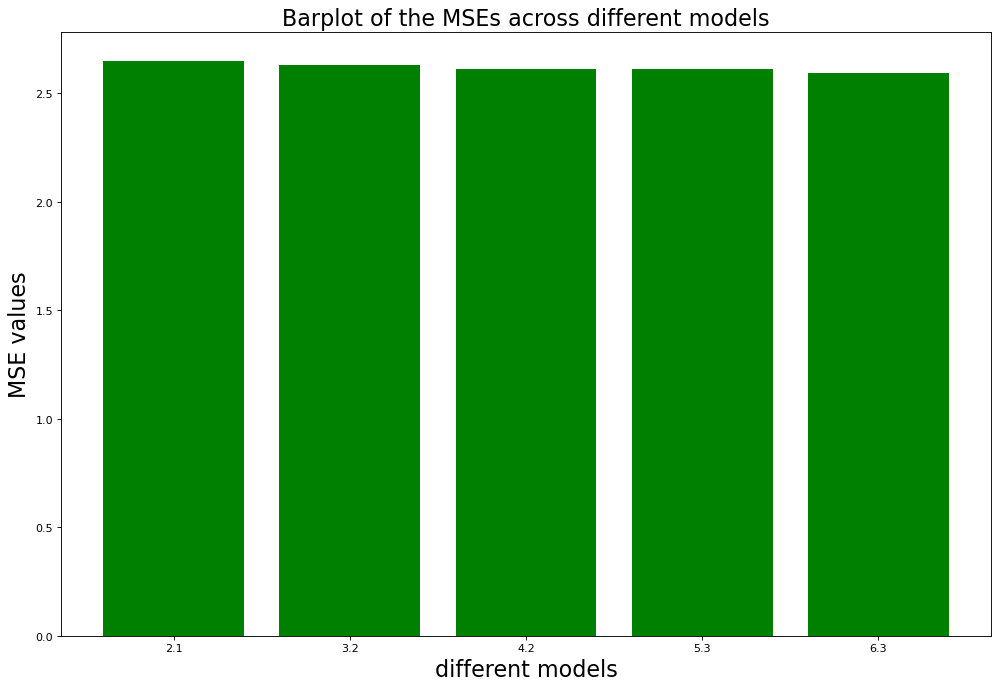

In [40]:
# your code here


plt.figure(figsize = (15,10), dpi=80)
plt.bar(list(best_mse_dict.keys()), best_mse_dict.values(), color='g')
plt.title("Barplot of the MSEs across different models", size = 20)
plt.xlabel("different models", size=20)
plt.ylabel("MSE values", size = 20)
plt.show()


In [41]:
best_mse_dict

{'2.1': 2.65190565451496,
 '3.2': 2.6329096269583325,
 '4.2': 2.6130106373530166,
 '5.3': 2.6130106373530166,
 '6.3': 2.594421570312363}

In [42]:
new_data_models = pd.DataFrame(list(best_mse_dict.items()), columns = ['Models', 'MSEs'])
new_data_models

,Models,MSEs
0,2.1,2.651906
1,3.2,2.632910
2,4.2,2.613011
3,5.3,2.613011
4,6.3,2.594422


Text(0.5, 0, 'MSE values')

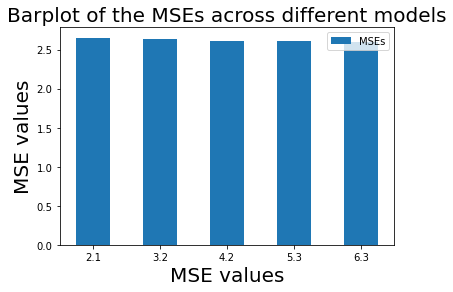

In [43]:
ax = new_data_models.plot.bar(x='Models', y='MSEs', rot =0)
ax.set_title("Barplot of the MSEs across different models", size =20)
ax.set_ylabel("MSE values", size = 20)
ax.set_xlabel("MSE values", size = 20)


<div class='exercise-r'>

**7.2** Which model do you think is best, and why? What are some of that model's drawbacks compared to the other models? 

</div>

**The best model is the model in 6.3. Our LASSO model decides what is significant out of the 9 pre-selected significant degrees. LASSO takes only what is essential to predict, meaning that this model is the one that reduces overfitting the most compared to the others.**


#### THE END